<a href="https://colab.research.google.com/github/sfeldmanMIG25/MANE4962_Classwork/blob/main/Feldman_Stephen_ML_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 4

Stephen Feldman RIN: 662047892

Problem 1: Construct a fully connected neural network model for classifying the CIFAR-10 dataset. Use a 70%-30% split for training and validation data.


In [26]:
# Load the CIFAR-10 dataset
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


Part a: Visualize the data by plotting an image from each category from the
CIFAR-10 dataset.


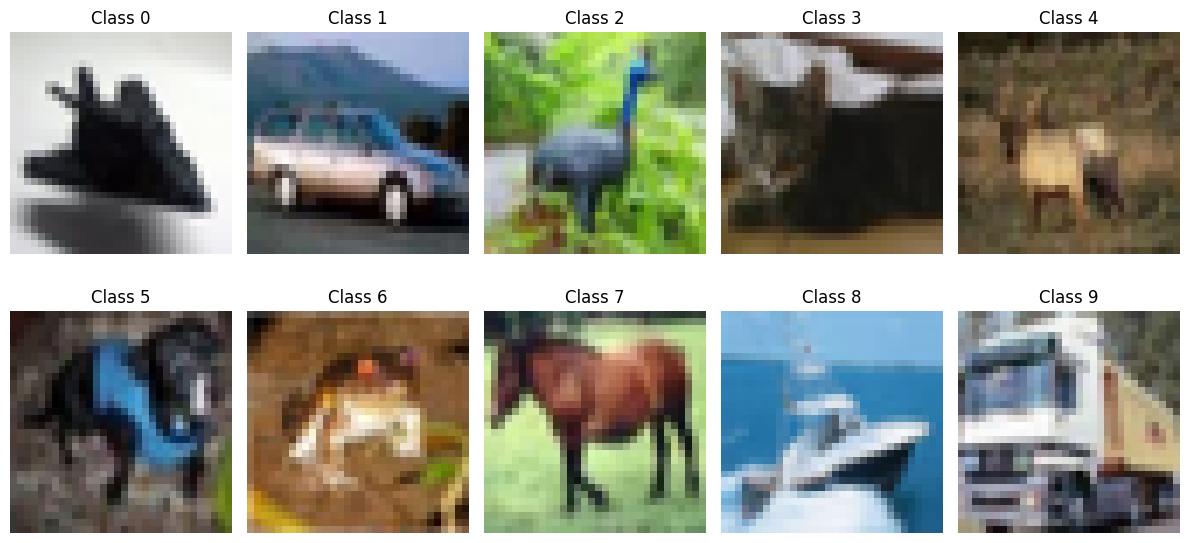

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Find the index of the first image for each class
class_indices = {}
for i in range(10):
    class_indices[i] = np.where(y_train == i)[0][0]

# Plot an image from each category
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[class_indices[i]])
    ax.set_title(f"Class {i}")
    ax.axis("off")

plt.tight_layout()
plt.show()


Part B: Demonstrate the tuning of the hyperparameters of the neural network
via grid-search.


In [28]:
#Adjust
from sklearn.model_selection import train_test_split
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)



(10000, 32, 32, 3)
(15000, 32, 32, 3)
(10000, 1)
(15000, 1)
0.28600001335144043
0.2449333369731903
0.0957999974489212
0.187866672873497
0.2945333421230316
0.2414666712284088
0.22973333299160004
0.20546667277812958
Best Accuracy: 0.2945333421230316
Best Parameters: {'learning_rate': 0.001, 'neurons1': 128, 'dropout_rate': 0.15}
Test Accuracy with Best Parameters: 0.29339998960494995


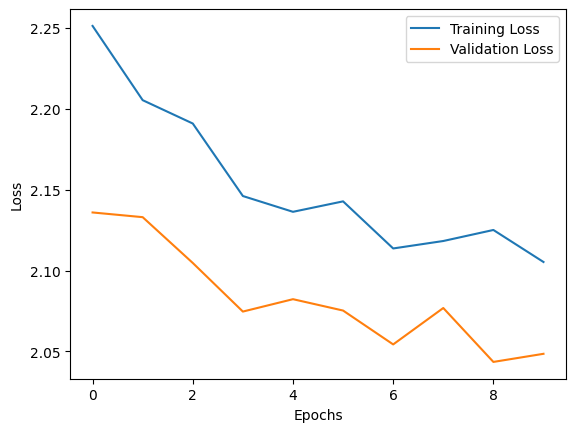

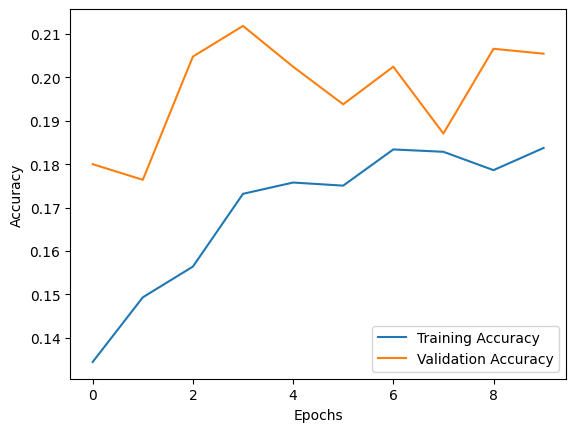

In [34]:
# Part (b): Hyperparameter Tuning with Grid Search
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

print(x_test.shape)
print(x_val.shape)
print(y_test.shape)
print(y_val.shape)

# Define the model
def create_model(learning_rate=0.001, neurons1=128, neurons2=64, neurons3=32, dropout_rate=0.2):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(neurons1, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation='relu'))  # Added a second hidden layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons3, activation='relu'))  # Added a third hidden layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons3, activation='relu'))  # Added a 4th hidden layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.001],
    'neurons1': [128, 64],
    'dropout_rate': [0.15, 0.25],
}

# Initialize variables to store best results
best_accuracy = 0
best_params = {}

# Manual grid search with for loops
for learning_rate in param_grid['learning_rate']:
    for neurons1 in param_grid['neurons1']:
        for dropout_rate in param_grid['dropout_rate']:
            # Create and train the model
            model = create_model(learning_rate=learning_rate, neurons1=neurons1, dropout_rate=dropout_rate)
            history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_val, y_val), verbose=0)

            # Evaluate the model
            _, accuracy = model.evaluate(x_val, y_val, verbose=0)
            print(accuracy)
            # Update best results if current model is better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'learning_rate': learning_rate, 'neurons1': neurons1, 'dropout_rate': dropout_rate}

# Print the best results
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

# Train the final model with the best parameters and evaluate on the test set
final_model = create_model(**best_params)
final_model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_val, y_val), verbose=0)
_, test_accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy with Best Parameters:", test_accuracy)

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The performance despite tuning is very low. The model with the better set of hyperparameters is still approaching 30 % in terms of accuracy. For the purposes of this question I kept the parameter list fairly short for gridsearch as it takes a while to retrain the model. However, over the course of the weeks I had also tried a number of strategy to increase model accuracy through tuning and by increasing layers to no avail. I note the poor performance of FCNN versus CNN for questions of image classification which was confirmed in literature I have seen online.

This question asked for a demonstration of gridsearch for tuning therefore, I believe its sufficient to have iterated through the parameters I have in the parameter varaible above. Neuron 1, dropout rate, learning rate. These represent just some of the factors but for the purposes of an academic/learning experience are sufficient to show how gridsearch would work. Due to the training time and limitations of FCNN I chose to limit the paremeters per execution. These are the best results.

Problem 2: Obtain the NASA airfoil self-noise dataset from UCI machine learning dataset repository. The dataset describes different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments. The following attributes were measured:

i. Frequency, in Hz.

ii. Angle of attack, in degrees.

iii. Chord length, in meters.

iv. Free-stream velocity, in meters per second.

v. Suction side displacement thickness, in meters.

The only measured output was:

i. Scaled sound pressure level, in decibels.

In [ ]:
import pandas as pd

# Download the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat

# Load the dataset into a Pandas DataFrame
columns = ['Frequency', 'AngleOfAttack', 'ChordLength', 'FreeStreamVelocity', 'SuctionSideDisplacementThickness', 'ScaledSoundPressureLevel']
df = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None, names=columns)

--2025-03-04 05:50:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘airfoil_self_noise.dat’

airfoil_self_noise.     [  <=>               ]  58.58K   178KB/s    in 0.3s    

2025-03-04 05:50:13 (178 KB/s) - ‘airfoil_self_noise.dat’ saved [59984]



Part a: Visualize the dataset

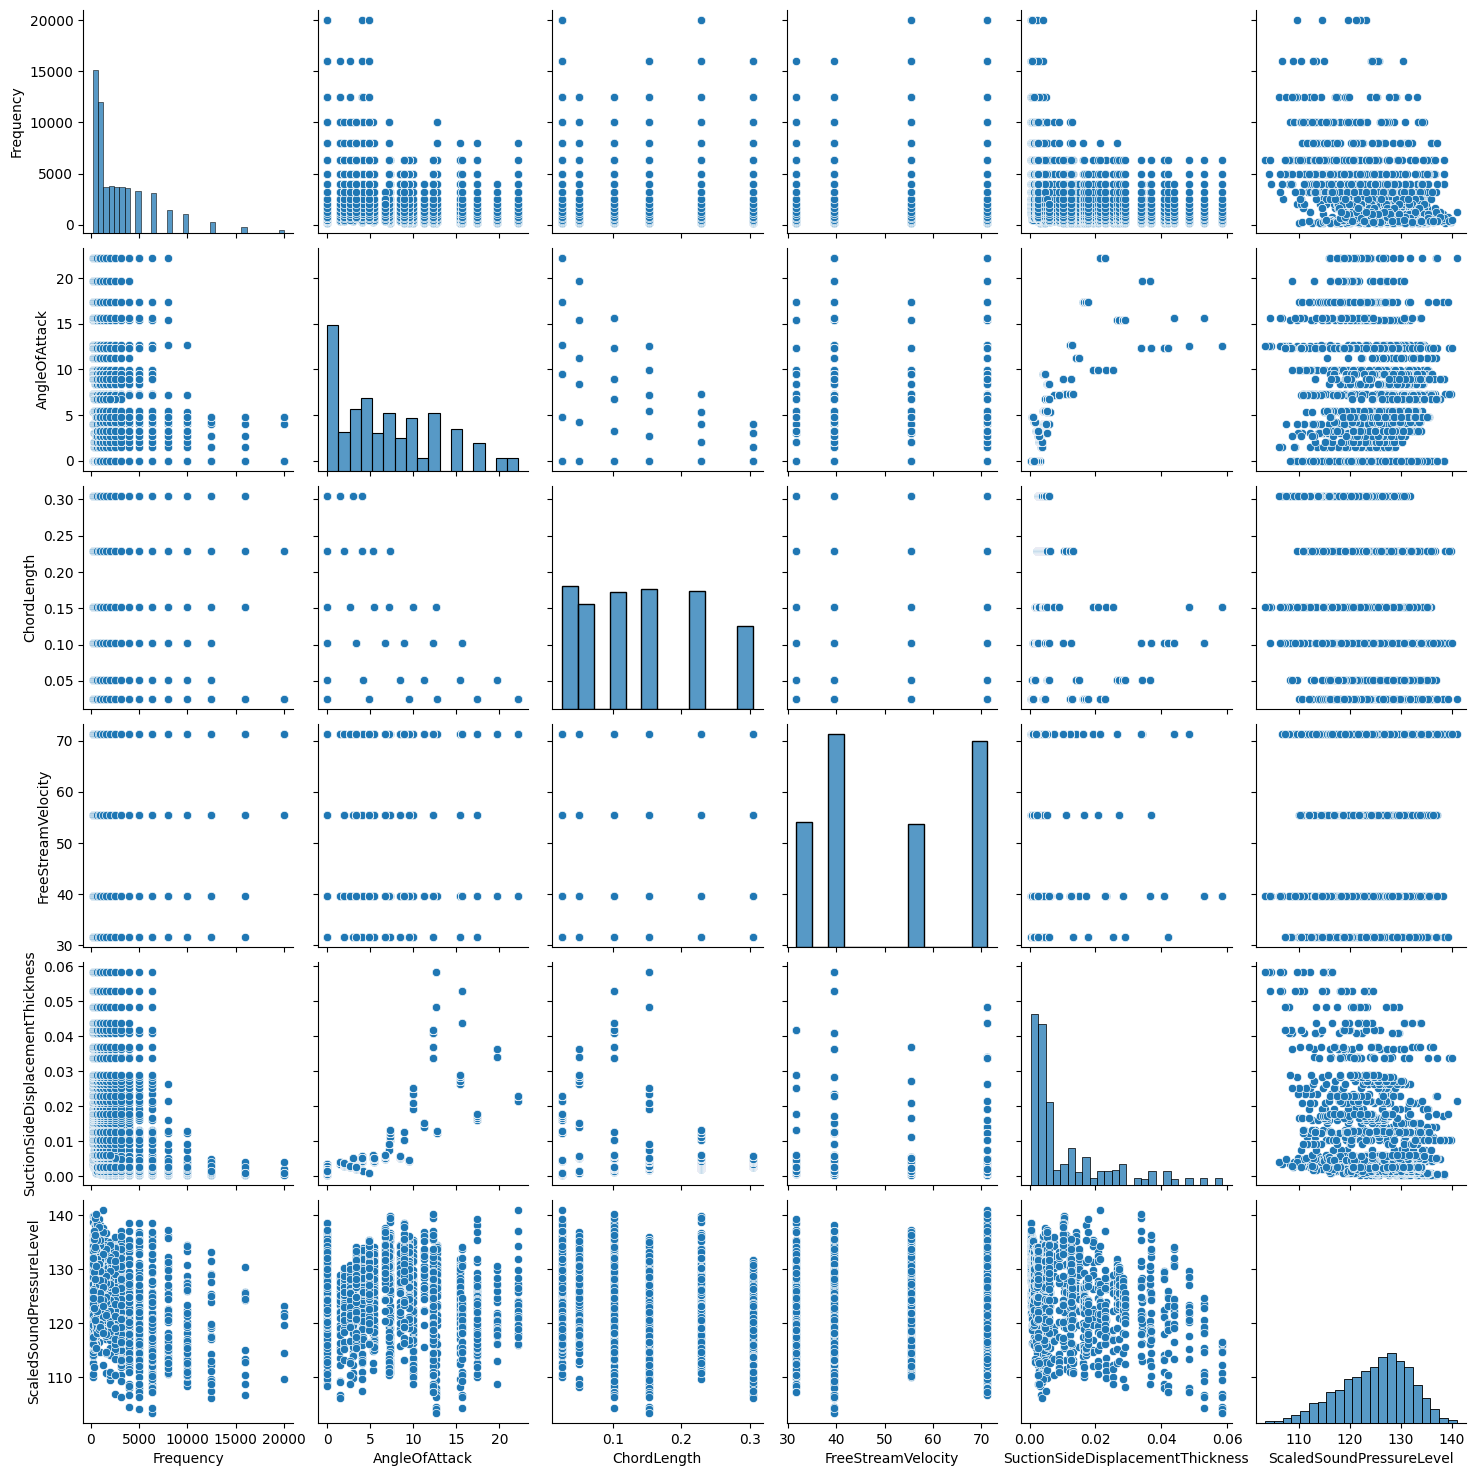

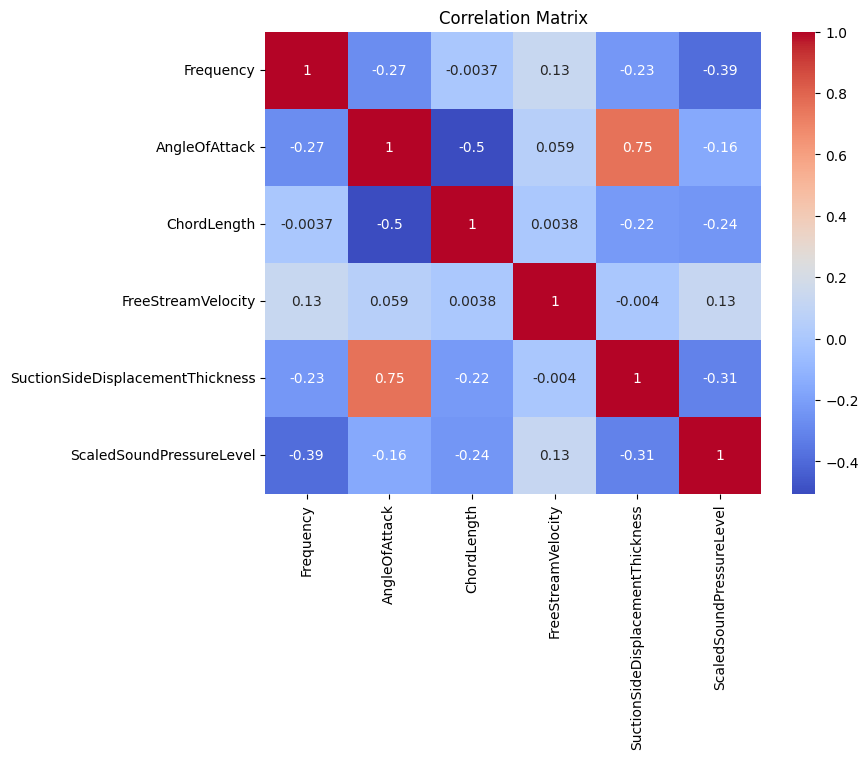

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Part B: Construct a fully connected neural network model for estimating
scaled sound pressure level, in decibels, from the attributes by choosing a 70%-30%
split

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X = df[['Frequency', 'AngleOfAttack', 'ChordLength', 'FreeStreamVelocity', 'SuctionSideDisplacementThickness']]
y = df['ScaledSoundPressureLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'RootMeanSquaredError'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Part C: Calculate the coefficient of determination

In [ ]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
R-squared: 0.9113039131653123


Mean Squared Error (MSE): 4.187573933616508
Mean Absolute Error (MAE): 1.5572443502557252


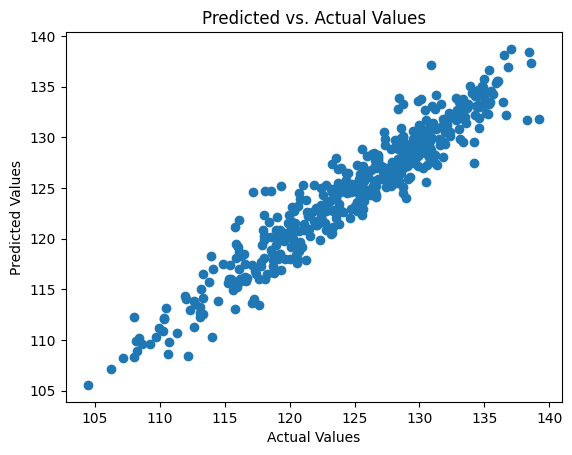

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# You can also plot predicted vs. actual values for visual inspection
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

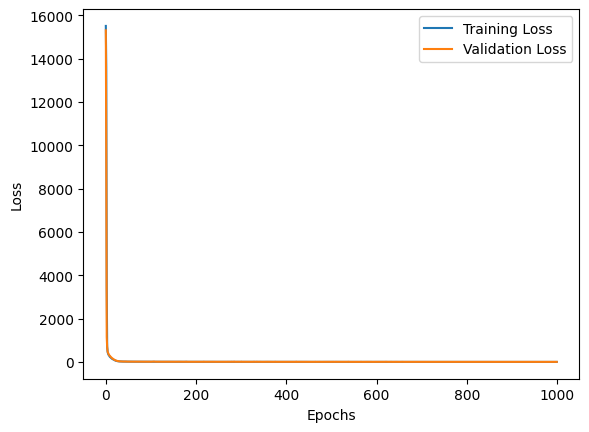

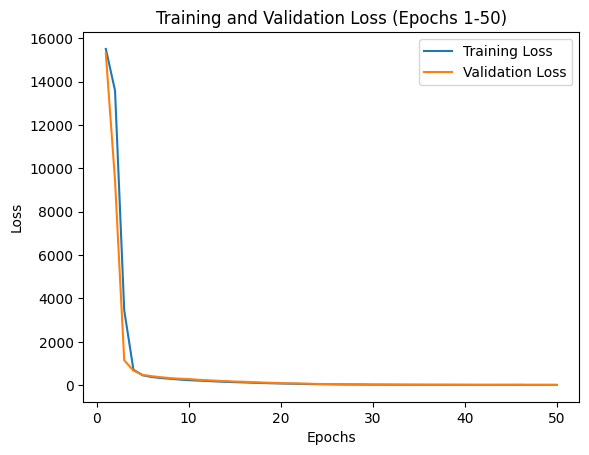

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
import matplotlib.pyplot as plt

# Assuming you have 'history' object from model.fit with epochs=1000
epochs_to_plot = range(1, 51)  # Epochs 1 to 50

# Extract loss values for the selected epochs
training_loss = history.history['loss'][:len(epochs_to_plot)]
validation_loss = history.history['val_loss'][:len(epochs_to_plot)]

# Plot the loss curves
plt.plot(epochs_to_plot, training_loss, label='Training Loss')  # Use epochs_to_plot for x-axis
plt.plot(epochs_to_plot, validation_loss, label='Validation Loss')  # Use epochs_to_plot for x-axis
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Epochs 1-50)')
plt.show()

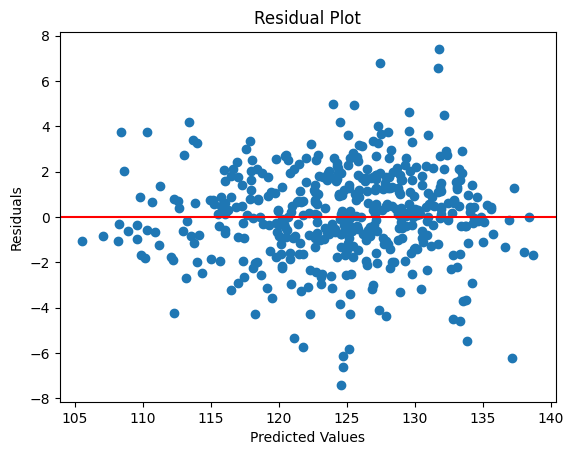

In [ ]:
residuals = y_test - y_pred.ravel() # Convert y_pred to 1D array using ravel()
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at zero
plt.title('Residual Plot')
plt.show()